<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [0]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-06-15 15:50:17.511970


In [0]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [0]:
# All States
states = pop['State'].tolist()
states.sort()

In [0]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [0]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [0]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

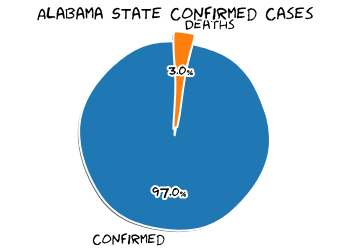

Alabama State Total Population
4887871
Alabama State Confirmed
25615 (0.5240522918874086% of population)
Alabama State Deaths
773 (3.017763029474917% of confirmed)



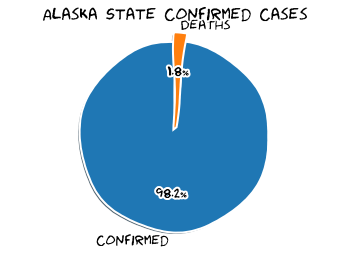

Alaska State Total Population
737438
Alaska State Confirmed
660 (0.08949904941161156% of population)
Alaska State Deaths
12 (1.8181818181818181% of confirmed)



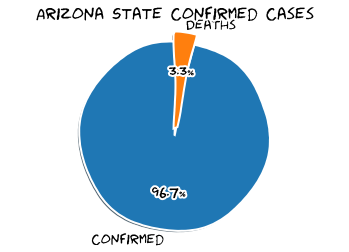

Arizona State Total Population
7171646
Arizona State Confirmed
35706 (0.497877335272823% of population)
Arizona State Deaths
1189 (3.3299725536324423% of confirmed)



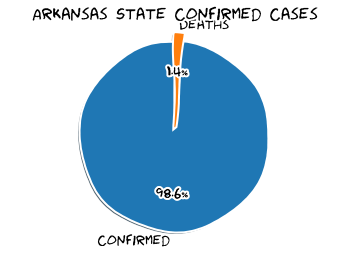

Arkansas State Total Population
3013825
Arkansas State Confirmed
12501 (0.4147885162542616% of population)
Arkansas State Deaths
179 (1.431885449164067% of confirmed)



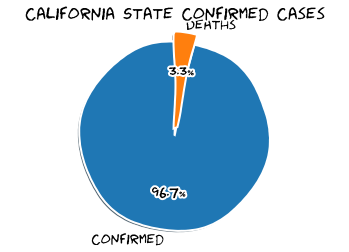

California State Total Population
39557045
California State Confirmed
152357 (0.3851576880932335% of population)
California State Deaths
5099 (3.3467448164508355% of confirmed)



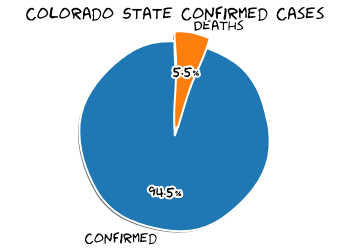

Colorado State Total Population
5695564
Colorado State Confirmed
29115 (0.5111873029606901% of population)
Colorado State Deaths
1598 (5.48857976987807% of confirmed)



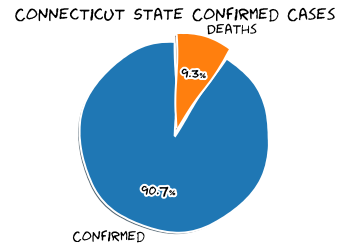

Connecticut State Total Population
3572665
Connecticut State Confirmed
45088 (1.2620270862227496% of population)
Connecticut State Deaths
4201 (9.317334989354151% of confirmed)



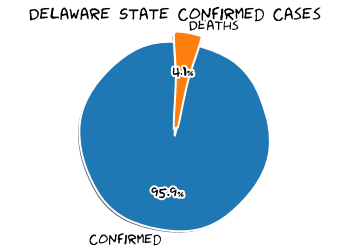

Delaware State Total Population
967171
Delaware State Confirmed
10264 (1.0612394292219267% of population)
Delaware State Deaths
422 (4.111457521434138% of confirmed)



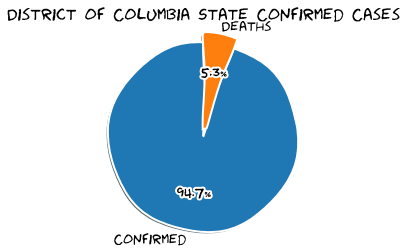

District of Columbia State Total Population
702455
District of Columbia State Confirmed
9767 (1.3904093500651287% of population)
District of Columbia State Deaths
515 (5.272857581652503% of confirmed)



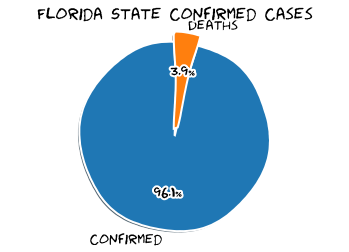

Florida State Total Population
21299325
Florida State Confirmed
75568 (0.35479058608664826% of population)
Florida State Deaths
2931 (3.87862587338556% of confirmed)



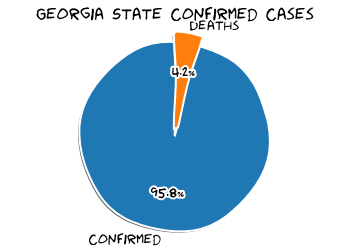

Georgia State Total Population
10519475
Georgia State Confirmed
57681 (0.5483258432573869% of population)
Georgia State Deaths
2451 (4.249232849638529% of confirmed)



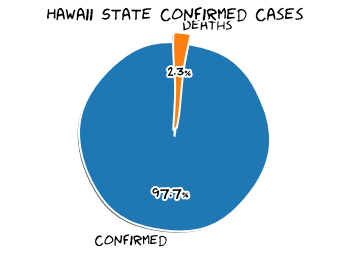

Hawaii State Total Population
1420491
Hawaii State Confirmed
728 (0.051249884722958466% of population)
Hawaii State Deaths
17 (2.3351648351648353% of confirmed)



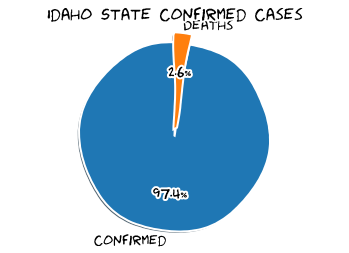

Idaho State Total Population
1754208
Idaho State Confirmed
3399 (0.193762655283752% of population)
Idaho State Deaths
87 (2.559576345984113% of confirmed)



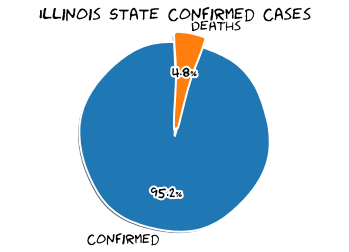

Illinois State Total Population
12741080
Illinois State Confirmed
132543 (1.040280729734057% of population)
Illinois State Deaths
6308 (4.759210218570577% of confirmed)



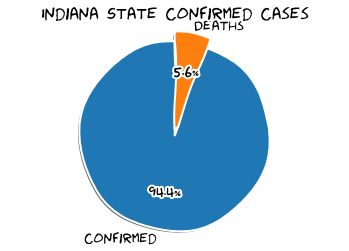

Indiana State Total Population
6691878
Indiana State Confirmed
39909 (0.5963796709981862% of population)
Indiana State Deaths
2240 (5.612769049587812% of confirmed)



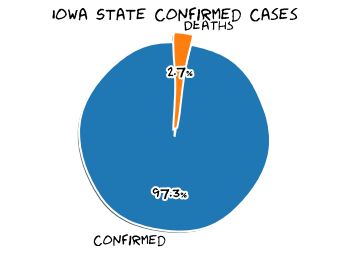

Iowa State Total Population
3156145
Iowa State Confirmed
23926 (0.7580767043339263% of population)
Iowa State Deaths
652 (2.7250689626347904% of confirmed)



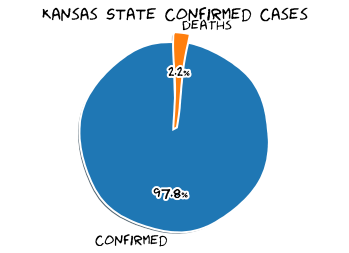

Kansas State Total Population
2911510
Kansas State Confirmed
11101 (0.3812798170021741% of population)
Kansas State Deaths
245 (2.2070083776236373% of confirmed)



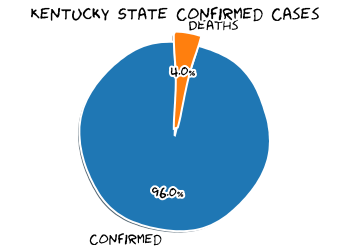

Kentucky State Total Population
4468402
Kentucky State Confirmed
12445 (0.27851119930570256% of population)
Kentucky State Deaths
499 (4.00964242667738% of confirmed)



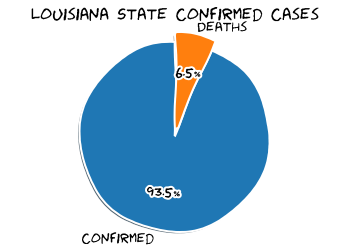

Louisiana State Total Population
4659978
Louisiana State Confirmed
46619 (1.0004124482991121% of population)
Louisiana State Deaths
3014 (6.465175143181964% of confirmed)



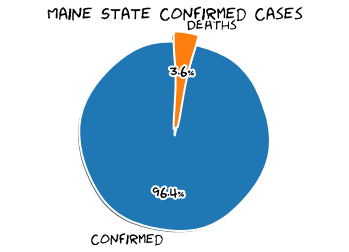

Maine State Total Population
1338404
Maine State Confirmed
2793 (0.20868138469400868% of population)
Maine State Deaths
100 (3.580379520229144% of confirmed)



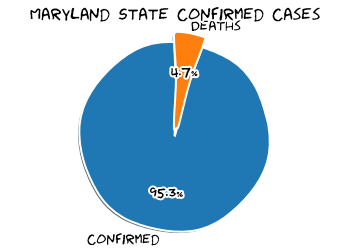

Maryland State Total Population
6042718
Maryland State Confirmed
61701 (1.0210802489872934% of population)
Maryland State Deaths
2907 (4.711430933048087% of confirmed)



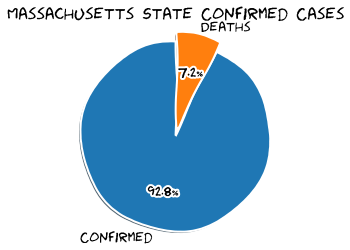

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
105603 (1.530001742935425% of population)
Massachusetts State Deaths
7624 (7.219491870496103% of confirmed)



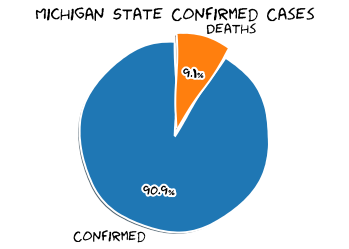

Michigan State Total Population
9995915
Michigan State Confirmed
66054 (0.6608099408608417% of population)
Michigan State Deaths
6016 (9.107699760801768% of confirmed)



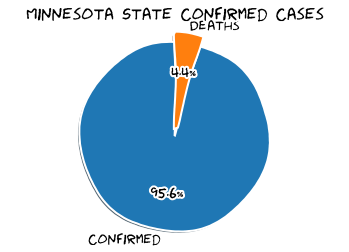

Minnesota State Total Population
5611179
Minnesota State Confirmed
30471 (0.5430409544945901% of population)
Minnesota State Deaths
1329 (4.361524072068524% of confirmed)



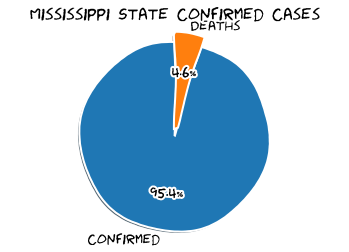

Mississippi State Total Population
2986530
Mississippi State Confirmed
19516 (0.6534674019681704% of population)
Mississippi State Deaths
891 (4.565484730477557% of confirmed)



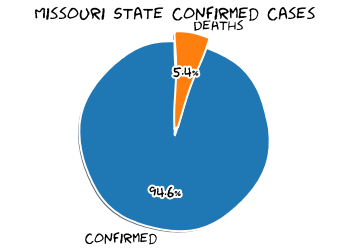

Missouri State Total Population
6126452
Missouri State Confirmed
16273 (0.2656186647671442% of population)
Missouri State Deaths
885 (5.43845633872058% of confirmed)



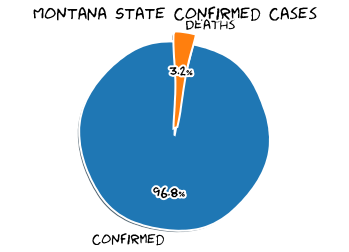

Montana State Total Population
1062305
Montana State Confirmed
601 (0.05657508907517144% of population)
Montana State Deaths
19 (3.1613976705490847% of confirmed)



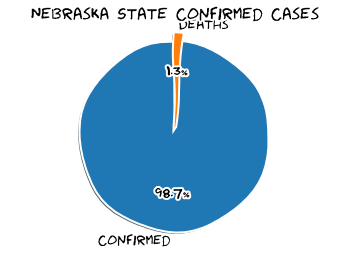

Nebraska State Total Population
1929268
Nebraska State Confirmed
16730 (0.8671682731481577% of population)
Nebraska State Deaths
215 (1.2851165570830843% of confirmed)



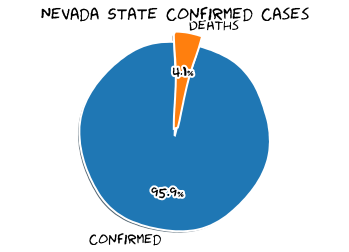

Nevada State Total Population
3034392
Nevada State Confirmed
11201 (0.3691349041257689% of population)
Nevada State Deaths
463 (4.133559503615748% of confirmed)



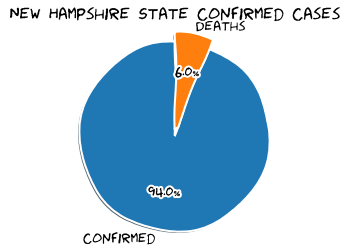

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
5318 (0.3920504726279767% of population)
New Hampshire State Deaths
320 (6.017299736743136% of confirmed)



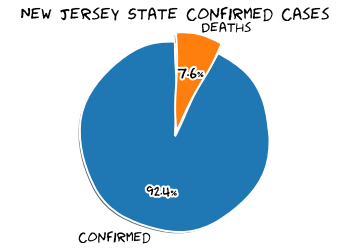

New Jersey State Total Population
8908520
New Jersey State Confirmed
166881 (1.8732741240969317% of population)
New Jersey State Deaths
12659 (7.585644860709129% of confirmed)



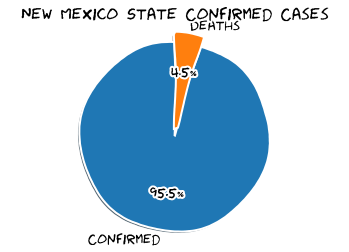

New Mexico State Total Population
2095428
New Mexico State Confirmed
9723 (0.4640102165285565% of population)
New Mexico State Deaths
435 (4.473927800061709% of confirmed)



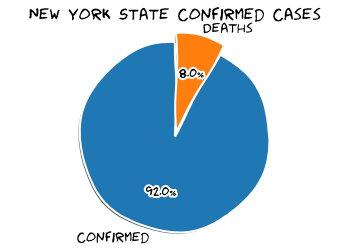

New York State Total Population
19542209
New York State Confirmed
383324 (1.9615182705291914% of population)
New York State Deaths
30825 (8.041500140872996% of confirmed)



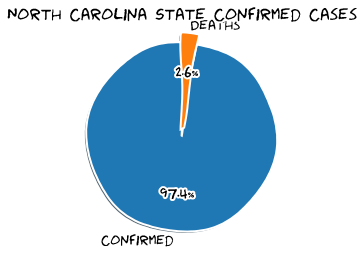

North Carolina State Total Population
10383620
North Carolina State Confirmed
44264 (0.42628678630381317% of population)
North Carolina State Deaths
1132 (2.5573829748780046% of confirmed)



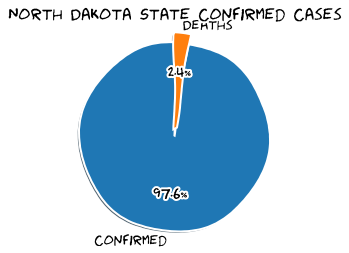

North Dakota State Total Population
760077
North Dakota State Confirmed
3080 (0.4052221024975101% of population)
North Dakota State Deaths
74 (2.4025974025974026% of confirmed)



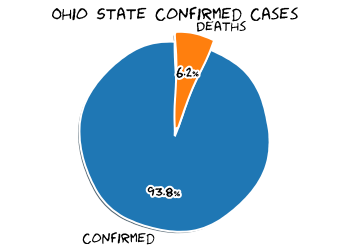

Ohio State Total Population
11689442
Ohio State Confirmed
41148 (0.35200995907246896% of population)
Ohio State Deaths
2559 (6.219014289880432% of confirmed)



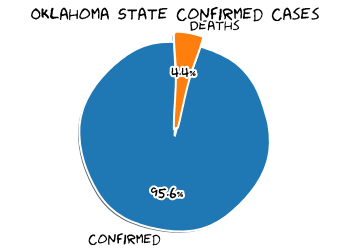

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
8231 (0.20874550066077804% of population)
Oklahoma State Deaths
359 (4.361559956262909% of confirmed)



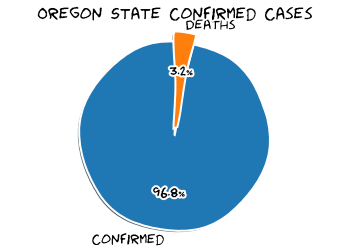

Oregon State Total Population
4190713
Oregon State Confirmed
5377 (0.12830752189424569% of population)
Oregon State Deaths
173 (3.2174074762878933% of confirmed)



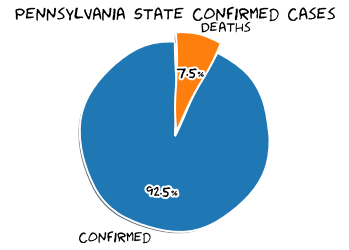

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
83203 (0.6496651065896466% of population)
Pennsylvania State Deaths
6215 (7.469682583560688% of confirmed)



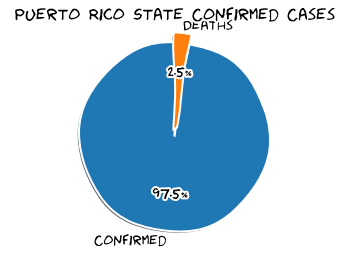

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
5890 (0.1843417200991627% of population)
Puerto Rico State Deaths
147 (2.495755517826825% of confirmed)



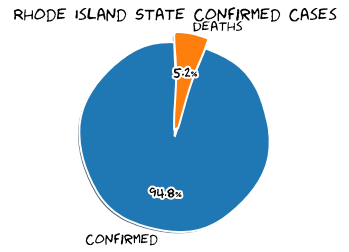

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
15947 (1.5082543991147386% of population)
Rhode Island State Deaths
833 (5.223553019376685% of confirmed)



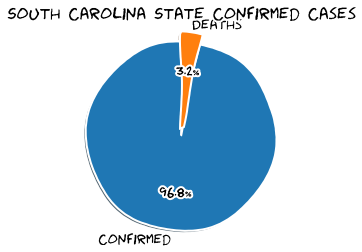

South Carolina State Total Population
5084127
South Carolina State Confirmed
18795 (0.36967998635753985% of population)
South Carolina State Deaths
600 (3.192338387869114% of confirmed)



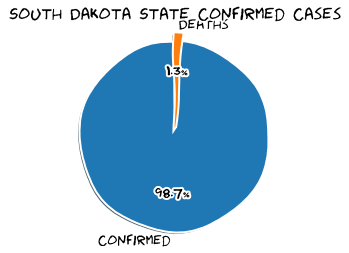

South Dakota State Total Population
882235
South Dakota State Confirmed
5898 (0.6685293600911322% of population)
South Dakota State Deaths
75 (1.2716174974567651% of confirmed)



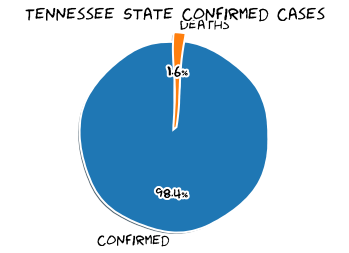

Tennessee State Total Population
6770010
Tennessee State Confirmed
30343 (0.4481972700188035% of population)
Tennessee State Deaths
474 (1.5621395379494447% of confirmed)



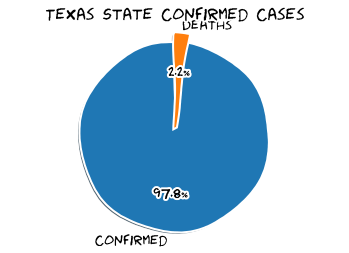

Texas State Total Population
28701845
Texas State Confirmed
88523 (0.3084226815384168% of population)
Texas State Deaths
1984 (2.2412254442348316% of confirmed)



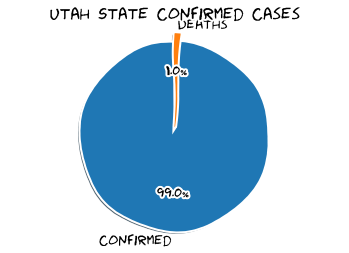

Utah State Total Population
3161105
Utah State Confirmed
14313 (0.4527847066136684% of population)
Utah State Deaths
139 (0.9711451128344862% of confirmed)



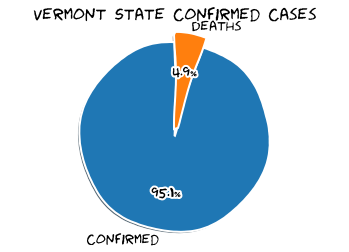

Vermont State Total Population
626299
Vermont State Confirmed
1127 (0.1799460002331155% of population)
Vermont State Deaths
55 (4.880212954747116% of confirmed)



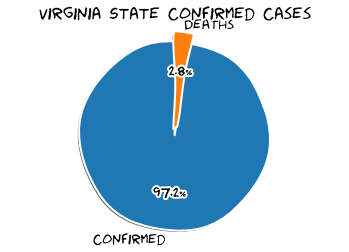

Virginia State Total Population
8517685
Virginia State Confirmed
54506 (0.639915657834259% of population)
Virginia State Deaths
1546 (2.836384985139251% of confirmed)



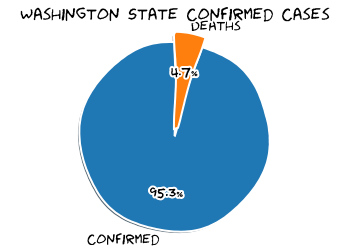

Washington State Total Population
7535591
Washington State Confirmed
25834 (0.34282646178647436% of population)
Washington State Deaths
1217 (4.710846171711697% of confirmed)



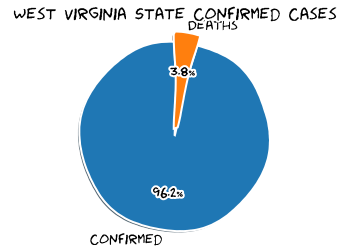

West Virginia State Total Population
1805832
West Virginia State Confirmed
2290 (0.12681135343708608% of population)
West Virginia State Deaths
88 (3.8427947598253276% of confirmed)



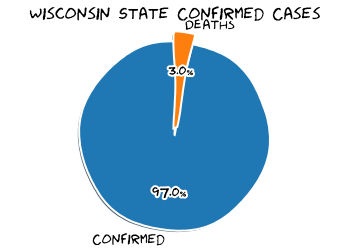

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
22758 (0.39146355559959045% of population)
Wisconsin State Deaths
692 (3.040688988487565% of confirmed)



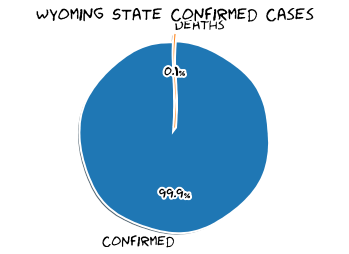

Wyoming State Total Population
577737
Wyoming State Confirmed
1060 (0.1834744875263312% of population)
Wyoming State Deaths
1 (0.09433962264150944% of confirmed)



In [10]:
for i in states:
    state_details(i)

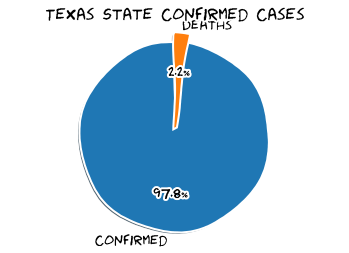

Texas State Total Population
28701845
Texas State Confirmed
88523 (0.3084226815384168% of population)
Texas State Deaths
1984 (2.2412254442348316% of confirmed)



In [11]:
state_details('Texas')

In [12]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
2094205
US Deaths
115499

New York City Confirmed
209878
New York City Deaths
22103

Philippines Confirmed
26420
Philippines Deaths
1098



In [13]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 7945479},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 434081},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-06-15T15:33:09.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 3799143},
 'source': 'https://github.com/mathdroid/covid19'}

In [0]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [15]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,45001,Abbeville,South Carolina,US,2020-06-15 03:33:14,34.22333378,-82.46170658,67,0,0,67,"Abbeville, South Carolina, US",273.1683450890855,0.0
1,22001,Acadia,Louisiana,US,2020-06-15 03:33:14,30.2950649,-92.41419698,583,31,0,552,"Acadia, Louisiana, US",939.6405834474978,5.317324185248713
2,51001,Accomack,Virginia,US,2020-06-15 03:33:14,37.76707161,-75.63234615,993,14,0,979,"Accomack, Virginia, US",3072.7812848124768,1.4098690835850958
3,16001,Ada,Idaho,US,2020-06-15 03:33:14,43.4526575,-116.24155159999998,892,22,0,870,"Ada, Idaho, US",185.22094657870747,2.4663677130044843
4,19001,Adair,Iowa,US,2020-06-15 03:33:14,41.33075609,-94.47105874,11,0,0,11,"Adair, Iowa, US",153.80313199105146,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3736,,,,West Bank and Gaza,2020-06-15 03:33:14,31.9522,35.2332,492,3,415,74,West Bank and Gaza,9.644381089485742,0.6097560975609756
3737,,,,Western Sahara,2020-06-15 03:33:14,24.2155,-12.8858,9,1,8,0,Western Sahara,1.5067048365225253,11.11111111111111
3738,,,,Yemen,2020-06-15 03:33:14,15.552726999999999,48.516388,728,164,53,511,Yemen,2.440826061370414,22.52747252747253
3739,,,,Zambia,2020-06-15 03:33:14,-13.133897,27.849332,1358,11,1122,225,Zambia,7.386875817152739,0.8100147275405007


In [16]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1592227985000,40.767273,-73.971526,209878,0,22103,187775,New York City,36061,"New York City, New York, US",2517.483591,None,None,84036061,USA
1,Illinois,US,1592227985000,41.841448,-87.816588,84906,0,4189,80717,Cook,17031,"Cook, Illinois, US",1648.585608,None,None,84017031,USA
2,California,US,1592227985000,34.308284,-118.228241,73023,0,2907,70116,Los Angeles,06037,"Los Angeles, California, US",727.385414,None,None,84006037,USA
3,New York,US,1592227985000,40.740665,-73.589419,41204,0,2165,39039,Nassau,36059,"Nassau, New York, US",3036.573898,None,None,84036059,USA
4,New York,US,1592227985000,40.883201,-72.801217,40659,0,1948,38711,Suffolk,36103,"Suffolk, New York, US",2753.553600,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,Wyoming,US,1592227985000,43.839612,-104.567488,1,0,0,1,Weston,56045,"Weston, Wyoming, US",14.436264,None,None,84056045,USA
3016,Montana,US,1592227985000,46.466525,-109.846464,1,0,0,1,Wheatland,30107,"Wheatland, Montana, US",47.036689,None,None,84030107,USA
3017,Kansas,US,1592227985000,37.559372,-95.743233,1,0,0,1,Wilson,20205,"Wilson, Kansas, US",11.730205,None,None,84020205,USA
3018,Kentucky,US,1592227985000,37.739416,-83.493036,1,0,0,1,Wolfe,21237,"Wolfe, Kentucky, US",13.972335,None,None,84021237,USA


In [17]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1592227985000,40.767273,-73.971526,209878,0,22103,187775,New York City,36061,"New York City, New York, US",2517.483591,None,None,84036061,USA
3,New York,US,1592227985000,40.740665,-73.589419,41204,0,2165,39039,Nassau,36059,"Nassau, New York, US",3036.573898,None,None,84036059,USA
4,New York,US,1592227985000,40.883201,-72.801217,40659,0,1948,38711,Suffolk,36103,"Suffolk, New York, US",2753.553600,None,None,84036103,USA
5,New York,US,1592227985000,41.162784,-73.757417,34290,0,1404,32886,Westchester,36119,"Westchester, New York, US",3544.164067,None,None,84036119,USA
24,New York,US,1592227985000,41.150279,-74.025605,13423,0,661,12762,Rockland,36087,"Rockland, New York, US",4120.151386,None,None,84036087,USA
32,New York,US,1592227985000,41.403375,-74.302408,10571,0,473,10098,Orange,36071,"Orange, New York, US",2746.142256,None,None,84036071,USA
64,New York,US,1592227985000,42.762490,-78.730637,6785,0,587,6198,Erie,36029,"Erie, New York, US",738.541986,None,None,84036029,USA
98,New York,US,1592227985000,41.764861,-73.743567,4056,0,145,3911,Dutchess,36027,"Dutchess, New York, US",1378.569632,None,None,84036027,USA
109,New York,US,1592227985000,43.146389,-77.693229,3370,0,247,3123,Monroe,36055,"Monroe, New York, US",454.318724,None,None,84036055,USA
145,New York,US,1592227985000,43.004919,-76.199712,2519,0,166,2353,Onondaga,36067,"Onondaga, New York, US",546.980857,None,None,84036067,USA


In [18]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

383324

In [19]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1592227985000,40.767273,-73.971526,209878,0,22103,187775,New York City,36061,"New York City, New York, US",2517.483591,None,None,84036061,USA


In [20]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
59,None,Philippines,1592231593000,12.879721,121.774017,26420,6252,1098,19070,None,None,Philippines,24.11,None,None,608,PHL,PH


In [21]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
